# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

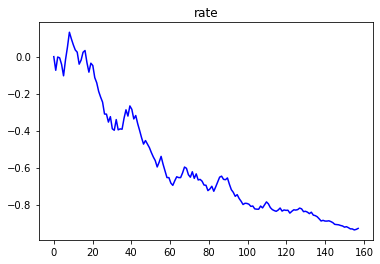

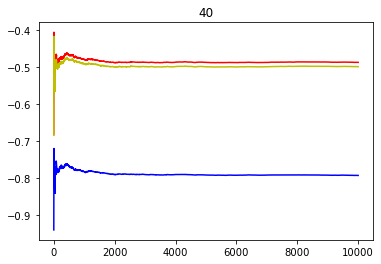

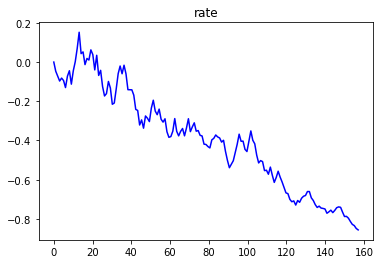

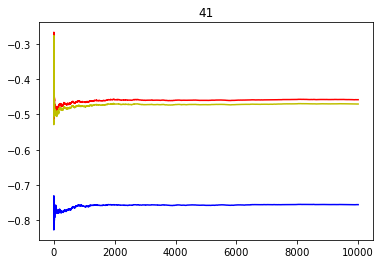

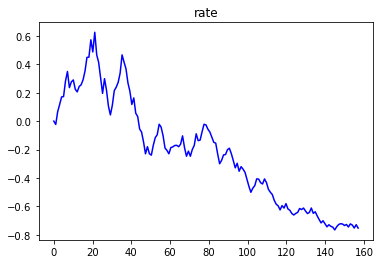

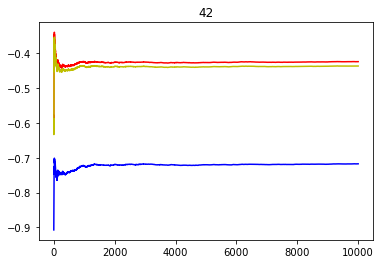

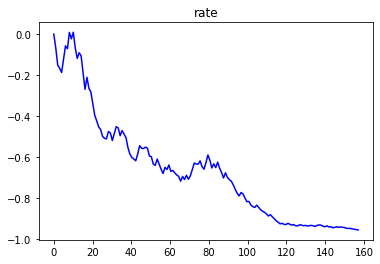

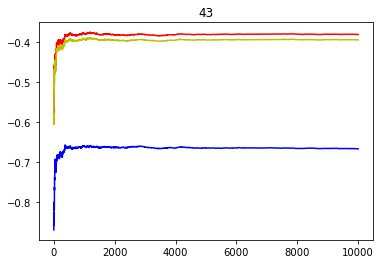

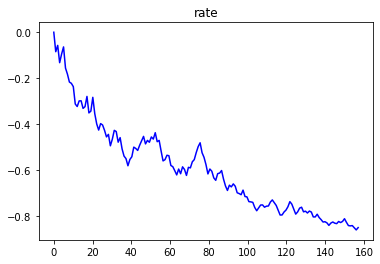

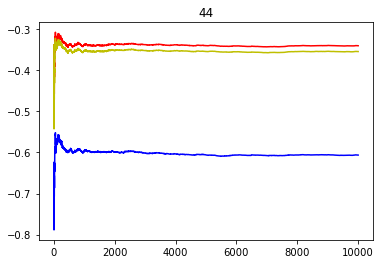

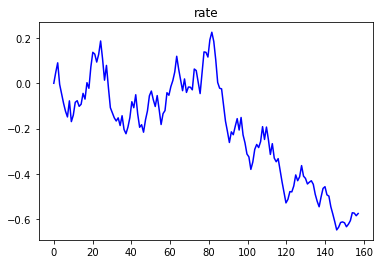

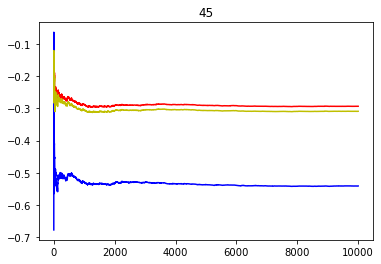

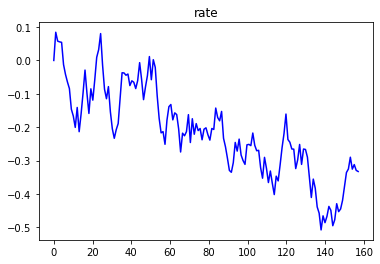

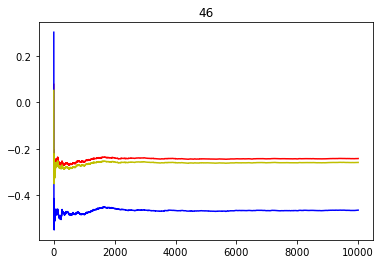

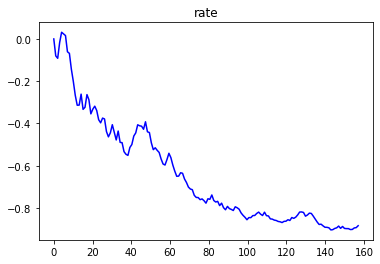

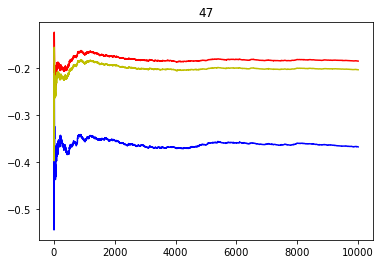

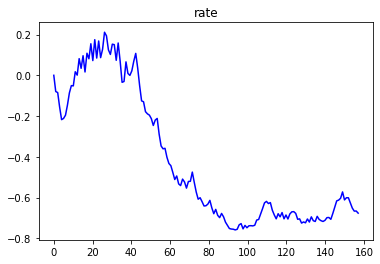

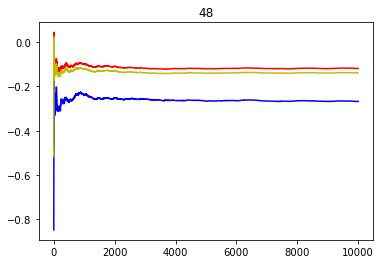

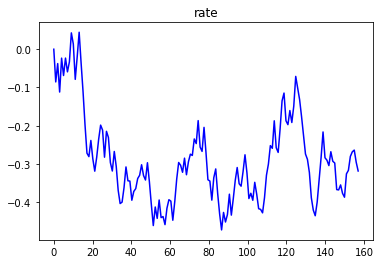

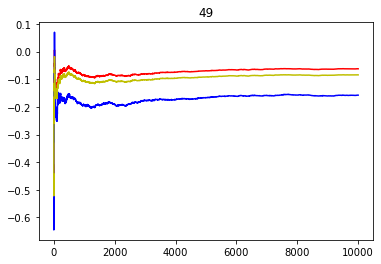

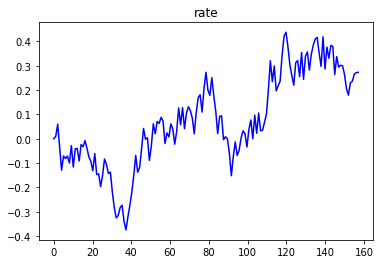

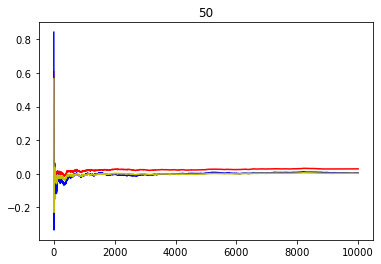

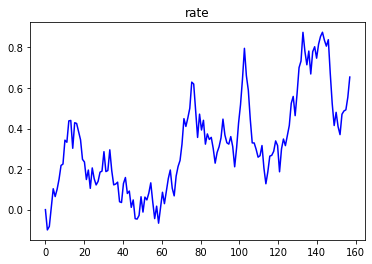

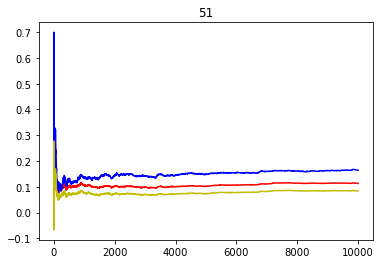

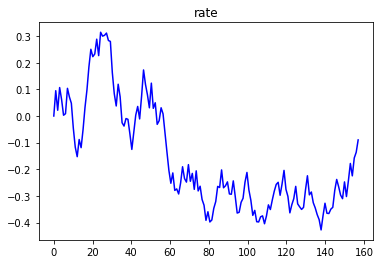

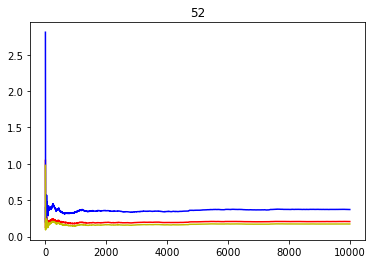

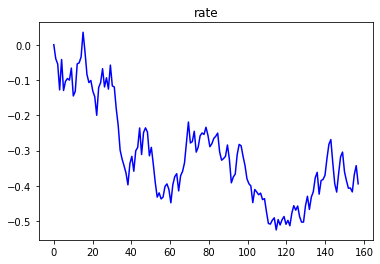

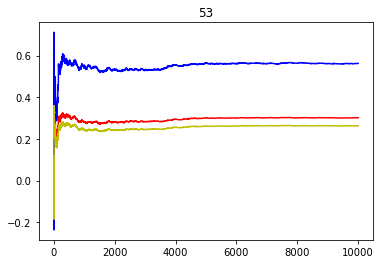

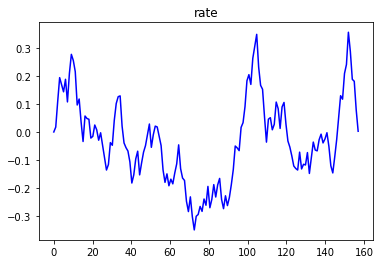

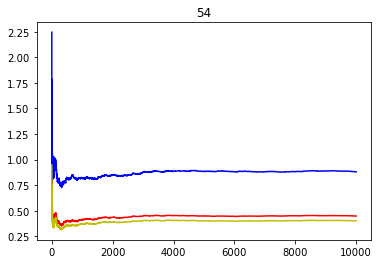

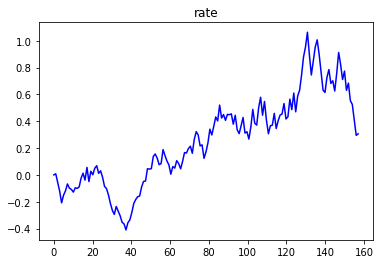

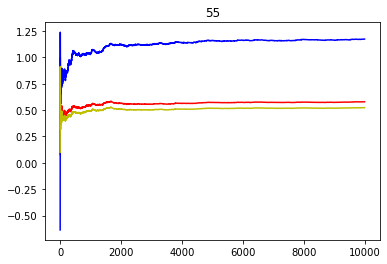

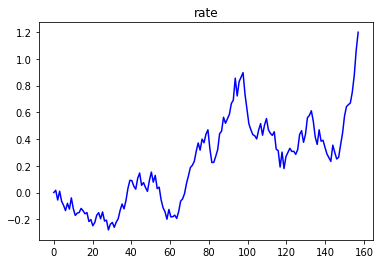

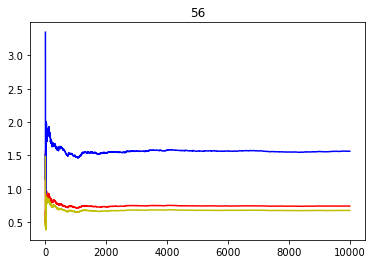

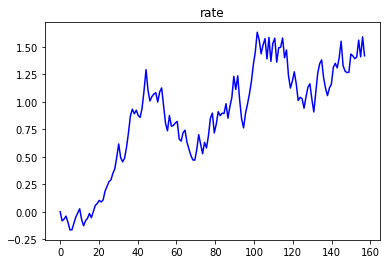

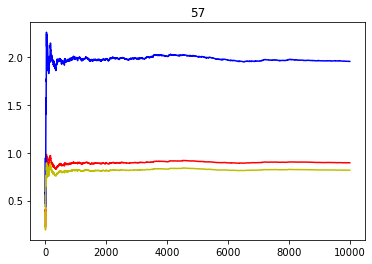

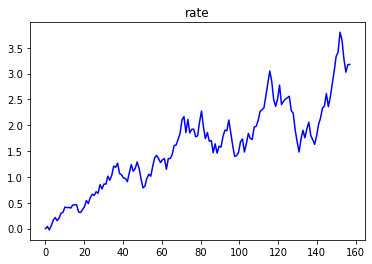

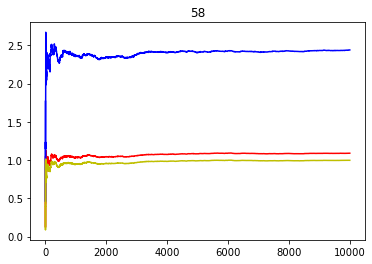

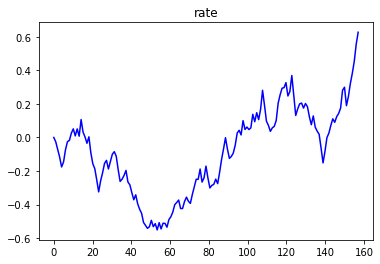

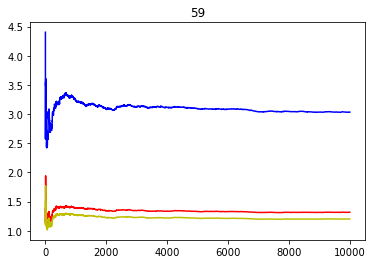

In [ ]:
def rand_rate(win_rate : float, time_steps : int):
    import random
    return [(-1 if random.random() > win_rate else 1) * random.random() / 10 for _ in range(time_steps)]

def paint(t, y):
    import matplotlib.pyplot as plt
    import numpy as np
    
    x = np.linspace(0, len(y[0]['data']), len(y[0]['data']))
    fig, ax = plt.subplots()
    for _y in y:
        ax.plot(x, _y['data'], color=_y['color'])
    plt.title(t)
    plt.show()
    
def paint_rate(rates):
    base = 1000
    nbase = base
    nr = [0]
    for ra in rates:
        nbase = nbase + nbase * ra
        nr.append((nbase - base) / base)
    paint("rate", y = [{
        'data': nr,
        'color': 'b',
    }]) 

def sim(rates, cases):
    return [case(rates) for case in cases]

def case1(rates):
    base = 1000
    wadd = 500
    wadd_max = 1000
    
    nbase = base
    addon = 0
    for ra in rates:
        base = base + addon
        nbase = nbase + addon
        
        fb = nbase * ra
        nbase = nbase + fb
        
        addon = max(wadd - fb, 0)
        addon = min(addon, wadd_max)
    return (nbase - base) / base

def case2(rates):
    base = 1000
    nbase = base
    for ra in rates:
        nbase = nbase + nbase * ra
    return (nbase - base) / base

def case3(rates):
    base = 1000
    wadd = 500
    nbase = base
    addon = 0
    for ra in rates:
        base = base + addon
        nbase = nbase + addon
        
        fb = nbase * ra
        nbase = nbase + fb
        
        addon = wadd
    return (nbase - base) / base


def rsim():
    import numpy as np
    for r in range(40, 60, 1):
        win = []
        rates = []
        for _ in range(10000):
            rates = rand_rate(r / 100, 52 * 3)
            win.append(sim(rates, [case1, case2, case3]))
        win = np.array(win)
        for i in range(len(win[0])):
            for j in range(len(win), 0, -1):
                win[j - 1, i] = win[:j, i].mean()
        
        paint_rate(rates)
        paint(
            t = r, 
            y=[
                {
                    'data': win[:,0],
                    'color': 'r',
                },
                {
                    'data': win[:,1],
                    'color': 'b',
                },
                {
                    'data': win[:,2],
                    'color': 'y',
                },
            ]
        )

rsim()

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook